In [1]:
import sys
sys.path.append("..")

In [2]:
from src.models.train_model import get_gen_dim, get_model, load_dataset, train, plot_progress

In [3]:
generator, discriminator = get_gen_dim()
combined = get_model(generator, discriminator)
combined.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
gout1 (Dense)                (None, 29)                9

In [4]:
for output in discriminator.outputs:
    print(output.name)

dout1/Sigmoid:0
dout2/Softmax:0


In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.690490,0.790291,0.562417,0.531736,0.467722,0.170001,0.501467,0.770823,0.536343,0.509373,...,0.177984,0.474313,0.473746,0.465864,0.622255,0.582509,0.253142,0.817530,0.655544,0.012220
1,0.940942,0.688453,0.948240,0.184716,0.649298,0.333862,0.602103,0.672431,0.637225,0.697625,...,0.157284,0.464797,0.597073,0.464846,0.519719,0.352846,0.221680,0.718259,0.615702,0.006774
2,0.911885,0.689200,0.950434,0.178711,0.670469,0.286374,0.615718,0.669897,0.586650,0.692045,...,0.140029,0.440626,0.393331,0.469595,0.603485,0.466324,0.402061,0.682451,0.575902,0.011610
3,0.933360,0.752628,0.725827,0.678446,0.694935,0.163800,0.583947,0.674822,0.520218,0.510993,...,0.166233,0.463238,0.479967,0.447907,0.682068,0.690283,0.443490,0.775439,0.718715,0.000122
4,0.864142,0.747112,0.840348,0.364616,0.683878,0.411674,0.563400,0.495973,0.820931,0.693109,...,0.071559,0.656066,0.372894,0.501147,0.678691,0.357822,0.144187,0.689326,0.573730,0.000854


In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_val.to_numpy(), y_val.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

In [8]:
f1_p = train(X_train,y_train,
             X_val,y_val,
             generator,discriminator,
             combined,
             num_classes=2,
             epochs=5000, 
             batch_size=128)

0 [D loss: 1.240639, acc: 59.38%, op_acc: 31.25%] [G loss: 0.815634]
Epoch: 0, F1: 0.65399, F1P: 0
1 [D loss: 1.197333, acc: 55.47%, op_acc: 35.16%] [G loss: 0.774203]
2 [D loss: 1.219769, acc: 51.56%, op_acc: 35.16%] [G loss: 0.743762]
3 [D loss: 1.194542, acc: 57.03%, op_acc: 30.47%] [G loss: 0.775302]
4 [D loss: 1.209744, acc: 50.78%, op_acc: 31.25%] [G loss: 0.709007]
5 [D loss: 1.224804, acc: 59.38%, op_acc: 34.38%] [G loss: 0.699669]
6 [D loss: 1.216416, acc: 58.59%, op_acc: 28.12%] [G loss: 0.656640]
7 [D loss: 1.075051, acc: 57.03%, op_acc: 31.25%] [G loss: 0.656031]
8 [D loss: 1.134095, acc: 62.50%, op_acc: 38.28%] [G loss: 0.523077]
9 [D loss: 1.100896, acc: 56.25%, op_acc: 36.72%] [G loss: 0.793130]
10 [D loss: 1.155737, acc: 57.03%, op_acc: 36.72%] [G loss: 0.640991]
Epoch: 10, F1: 0.62257, F1P: 1
11 [D loss: 1.174904, acc: 57.03%, op_acc: 28.12%] [G loss: 0.681715]
12 [D loss: 1.136758, acc: 57.03%, op_acc: 35.94%] [G loss: 0.621184]
13 [D loss: 1.170091, acc: 58.59%, op_a

113 [D loss: 0.764686, acc: 57.81%, op_acc: 57.03%] [G loss: 0.542407]
114 [D loss: 0.769192, acc: 58.59%, op_acc: 60.94%] [G loss: 0.453497]
115 [D loss: 0.805037, acc: 58.59%, op_acc: 58.59%] [G loss: 0.539154]
116 [D loss: 0.770731, acc: 63.28%, op_acc: 57.03%] [G loss: 0.436918]
117 [D loss: 0.800706, acc: 50.78%, op_acc: 59.38%] [G loss: 0.500121]
118 [D loss: 0.769702, acc: 57.03%, op_acc: 60.94%] [G loss: 0.520231]
119 [D loss: 0.807922, acc: 53.91%, op_acc: 57.03%] [G loss: 0.476700]
120 [D loss: 0.767872, acc: 53.12%, op_acc: 64.06%] [G loss: 0.473328]
Epoch: 120, F1: 0.92500, F1P: 12
121 [D loss: 0.783523, acc: 55.47%, op_acc: 60.94%] [G loss: 0.450615]
122 [D loss: 0.795445, acc: 53.91%, op_acc: 59.38%] [G loss: 0.499190]
123 [D loss: 0.768204, acc: 57.03%, op_acc: 57.81%] [G loss: 0.436353]
124 [D loss: 0.788417, acc: 60.16%, op_acc: 64.06%] [G loss: 0.492965]
125 [D loss: 0.777424, acc: 61.72%, op_acc: 55.47%] [G loss: 0.449241]
126 [D loss: 0.751925, acc: 54.69%, op_acc: 

225 [D loss: 0.633456, acc: 57.81%, op_acc: 78.91%] [G loss: 0.381428]
226 [D loss: 0.700132, acc: 59.38%, op_acc: 73.44%] [G loss: 0.507770]
227 [D loss: 0.623403, acc: 66.41%, op_acc: 74.22%] [G loss: 0.450769]
228 [D loss: 0.685991, acc: 61.72%, op_acc: 68.75%] [G loss: 0.401012]
229 [D loss: 0.662242, acc: 63.28%, op_acc: 75.78%] [G loss: 0.530778]
230 [D loss: 0.680486, acc: 59.38%, op_acc: 73.44%] [G loss: 0.421504]
Epoch: 230, F1: 0.88312, F1P: 23
231 [D loss: 0.682507, acc: 57.81%, op_acc: 72.66%] [G loss: 0.424029]
232 [D loss: 0.728214, acc: 60.94%, op_acc: 65.62%] [G loss: 0.466069]
233 [D loss: 0.665166, acc: 60.16%, op_acc: 76.56%] [G loss: 0.486930]
234 [D loss: 0.677849, acc: 67.19%, op_acc: 77.34%] [G loss: 0.444780]
235 [D loss: 0.676758, acc: 64.84%, op_acc: 72.66%] [G loss: 0.451317]
236 [D loss: 0.615374, acc: 67.97%, op_acc: 81.25%] [G loss: 0.414662]
237 [D loss: 0.678446, acc: 65.62%, op_acc: 70.31%] [G loss: 0.435981]
238 [D loss: 0.641083, acc: 61.72%, op_acc: 

337 [D loss: 0.582904, acc: 75.00%, op_acc: 82.03%] [G loss: 0.437714]
338 [D loss: 0.578652, acc: 64.06%, op_acc: 81.25%] [G loss: 0.389687]
339 [D loss: 0.584095, acc: 68.75%, op_acc: 83.59%] [G loss: 0.400909]
340 [D loss: 0.533790, acc: 71.09%, op_acc: 85.16%] [G loss: 0.407544]
Epoch: 340, F1: 0.92593, F1P: 34
341 [D loss: 0.582764, acc: 62.50%, op_acc: 85.16%] [G loss: 0.416893]
342 [D loss: 0.552951, acc: 72.66%, op_acc: 85.94%] [G loss: 0.419075]
343 [D loss: 0.558128, acc: 72.66%, op_acc: 82.81%] [G loss: 0.456059]
344 [D loss: 0.558922, acc: 73.44%, op_acc: 85.16%] [G loss: 0.417918]
345 [D loss: 0.605254, acc: 69.53%, op_acc: 76.56%] [G loss: 0.394163]
346 [D loss: 0.611441, acc: 65.62%, op_acc: 75.00%] [G loss: 0.408209]
347 [D loss: 0.577328, acc: 75.78%, op_acc: 79.69%] [G loss: 0.408825]
348 [D loss: 0.602644, acc: 68.75%, op_acc: 80.47%] [G loss: 0.399211]
349 [D loss: 0.551844, acc: 62.50%, op_acc: 84.38%] [G loss: 0.399124]
350 [D loss: 0.572298, acc: 71.09%, op_acc: 

450 [D loss: 0.547831, acc: 78.12%, op_acc: 82.81%] [G loss: 0.384046]
Epoch: 450, F1: 0.92593, F1P: 45
451 [D loss: 0.539492, acc: 70.31%, op_acc: 82.03%] [G loss: 0.409327]
452 [D loss: 0.551503, acc: 77.34%, op_acc: 78.91%] [G loss: 0.426993]
453 [D loss: 0.543558, acc: 77.34%, op_acc: 78.91%] [G loss: 0.439563]
454 [D loss: 0.534897, acc: 72.66%, op_acc: 79.69%] [G loss: 0.422825]
455 [D loss: 0.561411, acc: 75.78%, op_acc: 79.69%] [G loss: 0.396994]
456 [D loss: 0.524908, acc: 77.34%, op_acc: 83.59%] [G loss: 0.382465]
457 [D loss: 0.518100, acc: 78.91%, op_acc: 82.03%] [G loss: 0.448378]
458 [D loss: 0.558012, acc: 76.56%, op_acc: 78.91%] [G loss: 0.413312]
459 [D loss: 0.549612, acc: 76.56%, op_acc: 85.16%] [G loss: 0.450015]
460 [D loss: 0.510821, acc: 73.44%, op_acc: 82.81%] [G loss: 0.443177]
Epoch: 460, F1: 0.93902, F1P: 46
461 [D loss: 0.560889, acc: 73.44%, op_acc: 80.47%] [G loss: 0.430707]
462 [D loss: 0.589691, acc: 78.12%, op_acc: 75.78%] [G loss: 0.432326]
463 [D loss

Epoch: 560, F1: 0.95181, F1P: 56
561 [D loss: 0.548832, acc: 68.75%, op_acc: 81.25%] [G loss: 0.415084]
562 [D loss: 0.504335, acc: 78.12%, op_acc: 85.16%] [G loss: 0.483799]
563 [D loss: 0.567774, acc: 67.19%, op_acc: 80.47%] [G loss: 0.439827]
564 [D loss: 0.536289, acc: 70.31%, op_acc: 83.59%] [G loss: 0.511923]
565 [D loss: 0.558297, acc: 75.00%, op_acc: 78.12%] [G loss: 0.485275]
566 [D loss: 0.561956, acc: 66.41%, op_acc: 80.47%] [G loss: 0.434683]
567 [D loss: 0.577833, acc: 68.75%, op_acc: 81.25%] [G loss: 0.470925]
568 [D loss: 0.563649, acc: 74.22%, op_acc: 82.81%] [G loss: 0.448092]
569 [D loss: 0.598673, acc: 64.84%, op_acc: 79.69%] [G loss: 0.435376]
570 [D loss: 0.537010, acc: 76.56%, op_acc: 85.94%] [G loss: 0.511748]
Epoch: 570, F1: 0.94545, F1P: 57
571 [D loss: 0.590407, acc: 66.41%, op_acc: 79.69%] [G loss: 0.441125]
572 [D loss: 0.572743, acc: 71.88%, op_acc: 82.81%] [G loss: 0.482709]
573 [D loss: 0.584143, acc: 73.44%, op_acc: 75.00%] [G loss: 0.450744]
574 [D loss

673 [D loss: 0.574566, acc: 73.44%, op_acc: 77.34%] [G loss: 0.544298]
674 [D loss: 0.643948, acc: 64.06%, op_acc: 69.53%] [G loss: 0.462822]
675 [D loss: 0.580861, acc: 69.53%, op_acc: 77.34%] [G loss: 0.484305]
676 [D loss: 0.634084, acc: 69.53%, op_acc: 68.75%] [G loss: 0.507880]
677 [D loss: 0.586005, acc: 68.75%, op_acc: 80.47%] [G loss: 0.425784]
678 [D loss: 0.623785, acc: 72.66%, op_acc: 79.69%] [G loss: 0.477501]
679 [D loss: 0.585103, acc: 70.31%, op_acc: 77.34%] [G loss: 0.482676]
680 [D loss: 0.621071, acc: 67.19%, op_acc: 76.56%] [G loss: 0.511933]
Epoch: 680, F1: 0.93103, F1P: 68
681 [D loss: 0.586898, acc: 67.19%, op_acc: 80.47%] [G loss: 0.508417]
682 [D loss: 0.632379, acc: 70.31%, op_acc: 71.88%] [G loss: 0.476927]
683 [D loss: 0.559442, acc: 71.09%, op_acc: 80.47%] [G loss: 0.466588]
684 [D loss: 0.639590, acc: 63.28%, op_acc: 76.56%] [G loss: 0.452714]
685 [D loss: 0.618553, acc: 64.84%, op_acc: 75.00%] [G loss: 0.466612]
686 [D loss: 0.542593, acc: 75.00%, op_acc: 

784 [D loss: 0.587551, acc: 74.22%, op_acc: 77.34%] [G loss: 0.480080]
785 [D loss: 0.701675, acc: 59.38%, op_acc: 64.06%] [G loss: 0.457422]
786 [D loss: 0.551024, acc: 76.56%, op_acc: 80.47%] [G loss: 0.494452]
787 [D loss: 0.596131, acc: 75.78%, op_acc: 77.34%] [G loss: 0.452934]
788 [D loss: 0.569764, acc: 71.88%, op_acc: 78.12%] [G loss: 0.440571]
789 [D loss: 0.717165, acc: 66.41%, op_acc: 64.84%] [G loss: 0.475790]
790 [D loss: 0.641797, acc: 64.84%, op_acc: 73.44%] [G loss: 0.465676]
Epoch: 790, F1: 0.90909, F1P: 79
791 [D loss: 0.593939, acc: 72.66%, op_acc: 78.91%] [G loss: 0.480050]
792 [D loss: 0.606990, acc: 70.31%, op_acc: 73.44%] [G loss: 0.467730]
793 [D loss: 0.614242, acc: 67.19%, op_acc: 75.78%] [G loss: 0.504408]
794 [D loss: 0.623901, acc: 66.41%, op_acc: 72.66%] [G loss: 0.463164]
795 [D loss: 0.632299, acc: 67.97%, op_acc: 71.09%] [G loss: 0.539679]
796 [D loss: 0.608538, acc: 77.34%, op_acc: 77.34%] [G loss: 0.469833]
797 [D loss: 0.607632, acc: 67.19%, op_acc: 

895 [D loss: 0.605542, acc: 73.44%, op_acc: 74.22%] [G loss: 0.488753]
896 [D loss: 0.581128, acc: 78.12%, op_acc: 78.12%] [G loss: 0.483387]
897 [D loss: 0.619090, acc: 75.00%, op_acc: 75.78%] [G loss: 0.520760]
898 [D loss: 0.604565, acc: 76.56%, op_acc: 79.69%] [G loss: 0.538780]
899 [D loss: 0.606196, acc: 77.34%, op_acc: 73.44%] [G loss: 0.555399]
900 [D loss: 0.576729, acc: 70.31%, op_acc: 79.69%] [G loss: 0.527230]
Epoch: 900, F1: 0.93023, F1P: 90
901 [D loss: 0.567763, acc: 78.91%, op_acc: 78.12%] [G loss: 0.491584]
902 [D loss: 0.590245, acc: 75.78%, op_acc: 74.22%] [G loss: 0.482264]
903 [D loss: 0.583404, acc: 75.78%, op_acc: 77.34%] [G loss: 0.537619]
904 [D loss: 0.574863, acc: 78.91%, op_acc: 80.47%] [G loss: 0.495057]
905 [D loss: 0.622726, acc: 78.12%, op_acc: 73.44%] [G loss: 0.541741]
906 [D loss: 0.583040, acc: 73.44%, op_acc: 78.91%] [G loss: 0.496311]
907 [D loss: 0.586458, acc: 69.53%, op_acc: 80.47%] [G loss: 0.471578]
908 [D loss: 0.607383, acc: 71.09%, op_acc: 

1006 [D loss: 0.594199, acc: 78.12%, op_acc: 74.22%] [G loss: 0.543737]
1007 [D loss: 0.516136, acc: 69.53%, op_acc: 84.38%] [G loss: 0.567802]
1008 [D loss: 0.569689, acc: 75.00%, op_acc: 80.47%] [G loss: 0.487545]
1009 [D loss: 0.561094, acc: 74.22%, op_acc: 77.34%] [G loss: 0.451725]
1010 [D loss: 0.564337, acc: 73.44%, op_acc: 79.69%] [G loss: 0.571306]
Epoch: 1010, F1: 0.90566, F1P: 101
1011 [D loss: 0.517063, acc: 74.22%, op_acc: 81.25%] [G loss: 0.581348]
1012 [D loss: 0.595830, acc: 78.12%, op_acc: 75.00%] [G loss: 0.491487]
1013 [D loss: 0.567721, acc: 83.59%, op_acc: 78.91%] [G loss: 0.514225]
1014 [D loss: 0.544490, acc: 75.78%, op_acc: 82.03%] [G loss: 0.532002]
1015 [D loss: 0.562587, acc: 72.66%, op_acc: 78.91%] [G loss: 0.503305]
1016 [D loss: 0.599421, acc: 69.53%, op_acc: 77.34%] [G loss: 0.497583]
1017 [D loss: 0.588202, acc: 68.75%, op_acc: 80.47%] [G loss: 0.518672]
1018 [D loss: 0.564636, acc: 74.22%, op_acc: 82.81%] [G loss: 0.593945]
1019 [D loss: 0.592444, acc: 

1116 [D loss: 0.585567, acc: 70.31%, op_acc: 78.12%] [G loss: 0.477973]
1117 [D loss: 0.510192, acc: 77.34%, op_acc: 85.16%] [G loss: 0.528596]
1118 [D loss: 0.524689, acc: 77.34%, op_acc: 79.69%] [G loss: 0.495736]
1119 [D loss: 0.535507, acc: 77.34%, op_acc: 82.03%] [G loss: 0.540710]
1120 [D loss: 0.553072, acc: 77.34%, op_acc: 79.69%] [G loss: 0.530636]
Epoch: 1120, F1: 0.94611, F1P: 112
1121 [D loss: 0.585820, acc: 71.09%, op_acc: 82.81%] [G loss: 0.552136]
1122 [D loss: 0.484233, acc: 80.47%, op_acc: 83.59%] [G loss: 0.498853]
1123 [D loss: 0.510560, acc: 76.56%, op_acc: 84.38%] [G loss: 0.517117]
1124 [D loss: 0.505026, acc: 79.69%, op_acc: 86.72%] [G loss: 0.552728]
1125 [D loss: 0.559955, acc: 70.31%, op_acc: 81.25%] [G loss: 0.515440]
1126 [D loss: 0.513103, acc: 77.34%, op_acc: 85.94%] [G loss: 0.529909]
1127 [D loss: 0.533494, acc: 76.56%, op_acc: 81.25%] [G loss: 0.524895]
1128 [D loss: 0.600579, acc: 71.88%, op_acc: 78.12%] [G loss: 0.564029]
1129 [D loss: 0.624268, acc: 

1227 [D loss: 0.556365, acc: 80.47%, op_acc: 81.25%] [G loss: 0.565281]
1228 [D loss: 0.509094, acc: 82.03%, op_acc: 82.03%] [G loss: 0.527731]
1229 [D loss: 0.527804, acc: 82.03%, op_acc: 81.25%] [G loss: 0.537989]
1230 [D loss: 0.546144, acc: 75.78%, op_acc: 82.03%] [G loss: 0.551067]
Epoch: 1230, F1: 0.93976, F1P: 123
1231 [D loss: 0.495358, acc: 82.03%, op_acc: 83.59%] [G loss: 0.543256]
1232 [D loss: 0.526797, acc: 78.12%, op_acc: 85.94%] [G loss: 0.516588]
1233 [D loss: 0.564298, acc: 78.91%, op_acc: 80.47%] [G loss: 0.552629]
1234 [D loss: 0.495711, acc: 78.91%, op_acc: 85.94%] [G loss: 0.519238]
1235 [D loss: 0.494000, acc: 77.34%, op_acc: 87.50%] [G loss: 0.558066]
1236 [D loss: 0.511517, acc: 75.78%, op_acc: 86.72%] [G loss: 0.559641]
1237 [D loss: 0.549821, acc: 77.34%, op_acc: 81.25%] [G loss: 0.572168]
1238 [D loss: 0.520483, acc: 75.78%, op_acc: 85.16%] [G loss: 0.548011]
1239 [D loss: 0.504624, acc: 79.69%, op_acc: 85.94%] [G loss: 0.550894]
1240 [D loss: 0.516771, acc: 

1338 [D loss: 0.555167, acc: 75.00%, op_acc: 82.81%] [G loss: 0.534983]
1339 [D loss: 0.535712, acc: 79.69%, op_acc: 82.81%] [G loss: 0.582661]
1340 [D loss: 0.474186, acc: 88.28%, op_acc: 84.38%] [G loss: 0.551657]
Epoch: 1340, F1: 0.92391, F1P: 134
1341 [D loss: 0.533397, acc: 80.47%, op_acc: 84.38%] [G loss: 0.584115]
1342 [D loss: 0.567467, acc: 74.22%, op_acc: 78.12%] [G loss: 0.552573]
1343 [D loss: 0.599896, acc: 82.81%, op_acc: 75.78%] [G loss: 0.565831]
1344 [D loss: 0.524592, acc: 82.81%, op_acc: 80.47%] [G loss: 0.556320]
1345 [D loss: 0.518158, acc: 78.91%, op_acc: 85.94%] [G loss: 0.581130]
1346 [D loss: 0.463535, acc: 86.72%, op_acc: 88.28%] [G loss: 0.513016]
1347 [D loss: 0.473972, acc: 82.03%, op_acc: 89.84%] [G loss: 0.572135]
1348 [D loss: 0.534875, acc: 84.38%, op_acc: 78.12%] [G loss: 0.568181]
1349 [D loss: 0.468681, acc: 82.81%, op_acc: 89.84%] [G loss: 0.562563]
1350 [D loss: 0.528402, acc: 87.50%, op_acc: 82.81%] [G loss: 0.579440]
Epoch: 1350, F1: 0.92391, F1P

1449 [D loss: 0.489338, acc: 84.38%, op_acc: 85.94%] [G loss: 0.468672]
1450 [D loss: 0.437418, acc: 92.97%, op_acc: 89.84%] [G loss: 0.465889]
Epoch: 1450, F1: 0.67984, F1P: 145
1451 [D loss: 0.495314, acc: 82.81%, op_acc: 82.81%] [G loss: 0.471148]
1452 [D loss: 0.489756, acc: 85.94%, op_acc: 83.59%] [G loss: 0.483568]
1453 [D loss: 0.544050, acc: 75.78%, op_acc: 82.03%] [G loss: 0.457275]
1454 [D loss: 0.449342, acc: 82.81%, op_acc: 88.28%] [G loss: 0.447101]
1455 [D loss: 0.488316, acc: 82.03%, op_acc: 85.16%] [G loss: 0.416985]
1456 [D loss: 0.475825, acc: 82.03%, op_acc: 83.59%] [G loss: 0.473006]
1457 [D loss: 0.528665, acc: 83.59%, op_acc: 83.59%] [G loss: 0.455003]
1458 [D loss: 0.530628, acc: 82.03%, op_acc: 82.81%] [G loss: 0.432923]
1459 [D loss: 0.458526, acc: 90.62%, op_acc: 88.28%] [G loss: 0.418404]
1460 [D loss: 0.505887, acc: 82.03%, op_acc: 87.50%] [G loss: 0.489155]
Epoch: 1460, F1: 0.66926, F1P: 146
1461 [D loss: 0.518814, acc: 82.81%, op_acc: 83.59%] [G loss: 0.43

1559 [D loss: 0.465508, acc: 89.84%, op_acc: 92.19%] [G loss: 0.346367]
1560 [D loss: 0.491114, acc: 87.50%, op_acc: 84.38%] [G loss: 0.385208]
Epoch: 1560, F1: 0.65649, F1P: 156
1561 [D loss: 0.474727, acc: 90.62%, op_acc: 85.16%] [G loss: 0.385853]
1562 [D loss: 0.421049, acc: 89.06%, op_acc: 86.72%] [G loss: 0.346968]
1563 [D loss: 0.418820, acc: 89.06%, op_acc: 92.19%] [G loss: 0.346226]
1564 [D loss: 0.422016, acc: 87.50%, op_acc: 91.41%] [G loss: 0.430432]
1565 [D loss: 0.477843, acc: 85.94%, op_acc: 89.84%] [G loss: 0.396682]
1566 [D loss: 0.419555, acc: 92.97%, op_acc: 88.28%] [G loss: 0.367080]
1567 [D loss: 0.443696, acc: 86.72%, op_acc: 90.62%] [G loss: 0.414663]
1568 [D loss: 0.410468, acc: 89.06%, op_acc: 87.50%] [G loss: 0.357177]
1569 [D loss: 0.401046, acc: 92.97%, op_acc: 89.84%] [G loss: 0.390958]
1570 [D loss: 0.436343, acc: 90.62%, op_acc: 88.28%] [G loss: 0.391413]
Epoch: 1570, F1: 0.65900, F1P: 157
1571 [D loss: 0.356615, acc: 96.09%, op_acc: 92.97%] [G loss: 0.36

1669 [D loss: 0.339442, acc: 96.09%, op_acc: 93.75%] [G loss: 0.358226]
1670 [D loss: 0.382627, acc: 96.09%, op_acc: 94.53%] [G loss: 0.334057]
Epoch: 1670, F1: 0.65649, F1P: 167
1671 [D loss: 0.369835, acc: 93.75%, op_acc: 92.97%] [G loss: 0.355327]
1672 [D loss: 0.356737, acc: 95.31%, op_acc: 93.75%] [G loss: 0.358313]
1673 [D loss: 0.362740, acc: 93.75%, op_acc: 89.06%] [G loss: 0.385163]
1674 [D loss: 0.391399, acc: 91.41%, op_acc: 86.72%] [G loss: 0.365824]
1675 [D loss: 0.451622, acc: 92.19%, op_acc: 87.50%] [G loss: 0.322153]
1676 [D loss: 0.392524, acc: 93.75%, op_acc: 91.41%] [G loss: 0.354759]
1677 [D loss: 0.428882, acc: 91.41%, op_acc: 87.50%] [G loss: 0.325268]
1678 [D loss: 0.447412, acc: 91.41%, op_acc: 87.50%] [G loss: 0.315067]
1679 [D loss: 0.376082, acc: 96.88%, op_acc: 90.62%] [G loss: 0.308600]
1680 [D loss: 0.424333, acc: 90.62%, op_acc: 86.72%] [G loss: 0.321660]
Epoch: 1680, F1: 0.65649, F1P: 168
1681 [D loss: 0.384931, acc: 89.84%, op_acc: 90.62%] [G loss: 0.36

1780 [D loss: 0.332550, acc: 95.31%, op_acc: 92.97%] [G loss: 0.355812]
Epoch: 1780, F1: 0.65649, F1P: 178
1781 [D loss: 0.315691, acc: 97.66%, op_acc: 95.31%] [G loss: 0.332454]
1782 [D loss: 0.370814, acc: 92.19%, op_acc: 90.62%] [G loss: 0.378283]
1783 [D loss: 0.327857, acc: 95.31%, op_acc: 92.97%] [G loss: 0.296839]
1784 [D loss: 0.312929, acc: 94.53%, op_acc: 94.53%] [G loss: 0.327230]
1785 [D loss: 0.302001, acc: 96.88%, op_acc: 95.31%] [G loss: 0.332641]
1786 [D loss: 0.316457, acc: 94.53%, op_acc: 93.75%] [G loss: 0.314145]
1787 [D loss: 0.369774, acc: 95.31%, op_acc: 92.19%] [G loss: 0.320956]
1788 [D loss: 0.298589, acc: 95.31%, op_acc: 92.19%] [G loss: 0.331122]
1789 [D loss: 0.299189, acc: 95.31%, op_acc: 94.53%] [G loss: 0.340548]
1790 [D loss: 0.311348, acc: 92.19%, op_acc: 92.19%] [G loss: 0.371356]
Epoch: 1790, F1: 0.65649, F1P: 179
1791 [D loss: 0.319806, acc: 97.66%, op_acc: 89.84%] [G loss: 0.344470]
1792 [D loss: 0.336801, acc: 96.88%, op_acc: 92.19%] [G loss: 0.30

1889 [D loss: 0.335566, acc: 97.66%, op_acc: 92.19%] [G loss: 0.254359]
1890 [D loss: 0.338820, acc: 92.97%, op_acc: 89.06%] [G loss: 0.275156]
Epoch: 1890, F1: 0.65399, F1P: 189
1891 [D loss: 0.289465, acc: 99.22%, op_acc: 95.31%] [G loss: 0.282553]
1892 [D loss: 0.323273, acc: 95.31%, op_acc: 92.97%] [G loss: 0.294655]
1893 [D loss: 0.405484, acc: 92.97%, op_acc: 85.94%] [G loss: 0.320620]
1894 [D loss: 0.292717, acc: 96.09%, op_acc: 95.31%] [G loss: 0.306214]
1895 [D loss: 0.298403, acc: 95.31%, op_acc: 96.88%] [G loss: 0.280442]
1896 [D loss: 0.357588, acc: 98.44%, op_acc: 92.19%] [G loss: 0.264975]
1897 [D loss: 0.316273, acc: 96.09%, op_acc: 92.19%] [G loss: 0.298177]
1898 [D loss: 0.293110, acc: 98.44%, op_acc: 93.75%] [G loss: 0.292276]
1899 [D loss: 0.282685, acc: 96.09%, op_acc: 95.31%] [G loss: 0.260894]
1900 [D loss: 0.327953, acc: 98.44%, op_acc: 94.53%] [G loss: 0.260292]
Epoch: 1900, F1: 0.65399, F1P: 190
1901 [D loss: 0.343648, acc: 96.09%, op_acc: 90.62%] [G loss: 0.32

2000 [D loss: 0.276273, acc: 96.88%, op_acc: 96.09%] [G loss: 0.236426]
Epoch: 2000, F1: 0.65399, F1P: 200
2001 [D loss: 0.307410, acc: 96.09%, op_acc: 92.97%] [G loss: 0.271632]
2002 [D loss: 0.229649, acc: 96.88%, op_acc: 96.09%] [G loss: 0.219579]
2003 [D loss: 0.308045, acc: 96.09%, op_acc: 92.97%] [G loss: 0.190134]
2004 [D loss: 0.388276, acc: 98.44%, op_acc: 89.06%] [G loss: 0.228999]
2005 [D loss: 0.269279, acc: 97.66%, op_acc: 94.53%] [G loss: 0.235307]
2006 [D loss: 0.255170, acc: 98.44%, op_acc: 96.09%] [G loss: 0.260909]
2007 [D loss: 0.301130, acc: 97.66%, op_acc: 94.53%] [G loss: 0.248508]
2008 [D loss: 0.352678, acc: 95.31%, op_acc: 90.62%] [G loss: 0.256499]
2009 [D loss: 0.271727, acc: 93.75%, op_acc: 93.75%] [G loss: 0.221344]
2010 [D loss: 0.241186, acc: 99.22%, op_acc: 95.31%] [G loss: 0.273172]
Epoch: 2010, F1: 0.65399, F1P: 201
2011 [D loss: 0.266822, acc: 98.44%, op_acc: 95.31%] [G loss: 0.232641]
2012 [D loss: 0.275803, acc: 99.22%, op_acc: 92.97%] [G loss: 0.22

2110 [D loss: 0.333237, acc: 94.53%, op_acc: 89.06%] [G loss: 0.149776]
Epoch: 2110, F1: 0.65399, F1P: 211
2111 [D loss: 0.250614, acc: 96.09%, op_acc: 93.75%] [G loss: 0.124528]
2112 [D loss: 0.227659, acc: 96.09%, op_acc: 93.75%] [G loss: 0.207505]
2113 [D loss: 0.219716, acc: 96.09%, op_acc: 97.66%] [G loss: 0.157290]
2114 [D loss: 0.263418, acc: 96.88%, op_acc: 92.19%] [G loss: 0.112153]
2115 [D loss: 0.300322, acc: 96.09%, op_acc: 89.84%] [G loss: 0.165995]
2116 [D loss: 0.277053, acc: 98.44%, op_acc: 94.53%] [G loss: 0.178369]
2117 [D loss: 0.293532, acc: 96.88%, op_acc: 91.41%] [G loss: 0.178921]
2118 [D loss: 0.274883, acc: 96.09%, op_acc: 90.62%] [G loss: 0.139725]
2119 [D loss: 0.218715, acc: 98.44%, op_acc: 96.09%] [G loss: 0.113158]
2120 [D loss: 0.279993, acc: 97.66%, op_acc: 91.41%] [G loss: 0.159103]
Epoch: 2120, F1: 0.65399, F1P: 212
2121 [D loss: 0.273203, acc: 98.44%, op_acc: 94.53%] [G loss: 0.131760]
2122 [D loss: 0.272658, acc: 96.09%, op_acc: 92.97%] [G loss: 0.14

Epoch: 2220, F1: 0.65399, F1P: 222
2221 [D loss: 0.184717, acc: 97.66%, op_acc: 96.88%] [G loss: 0.066489]
2222 [D loss: 0.244045, acc: 96.09%, op_acc: 95.31%] [G loss: 0.085922]
2223 [D loss: 0.205036, acc: 97.66%, op_acc: 96.09%] [G loss: 0.085043]
2224 [D loss: 0.246050, acc: 96.88%, op_acc: 93.75%] [G loss: 0.098500]
2225 [D loss: 0.292711, acc: 95.31%, op_acc: 92.97%] [G loss: 0.059558]
2226 [D loss: 0.223483, acc: 97.66%, op_acc: 94.53%] [G loss: 0.086999]
2227 [D loss: 0.230326, acc: 99.22%, op_acc: 95.31%] [G loss: 0.085687]
2228 [D loss: 0.172206, acc: 96.88%, op_acc: 97.66%] [G loss: 0.068887]
2229 [D loss: 0.250238, acc: 96.09%, op_acc: 94.53%] [G loss: 0.053972]
2230 [D loss: 0.191048, acc: 97.66%, op_acc: 96.88%] [G loss: 0.065378]
Epoch: 2230, F1: 0.65399, F1P: 223
2231 [D loss: 0.198813, acc: 99.22%, op_acc: 98.44%] [G loss: 0.092068]
2232 [D loss: 0.255915, acc: 98.44%, op_acc: 93.75%] [G loss: 0.077782]
2233 [D loss: 0.212119, acc: 98.44%, op_acc: 96.09%] [G loss: 0.07

2330 [D loss: 0.192783, acc: 98.44%, op_acc: 96.88%] [G loss: 0.052941]
Epoch: 2330, F1: 0.65399, F1P: 233
2331 [D loss: 0.176085, acc: 97.66%, op_acc: 96.88%] [G loss: 0.052032]
2332 [D loss: 0.229900, acc: 95.31%, op_acc: 92.97%] [G loss: 0.044739]
2333 [D loss: 0.161272, acc: 96.88%, op_acc: 97.66%] [G loss: 0.056713]
2334 [D loss: 0.229751, acc: 97.66%, op_acc: 93.75%] [G loss: 0.036870]
2335 [D loss: 0.250042, acc: 95.31%, op_acc: 94.53%] [G loss: 0.036531]
2336 [D loss: 0.225130, acc: 96.88%, op_acc: 94.53%] [G loss: 0.043193]
2337 [D loss: 0.308416, acc: 95.31%, op_acc: 89.06%] [G loss: 0.039095]
2338 [D loss: 0.268105, acc: 97.66%, op_acc: 94.53%] [G loss: 0.051821]
2339 [D loss: 0.248636, acc: 96.88%, op_acc: 92.97%] [G loss: 0.058654]
2340 [D loss: 0.242553, acc: 96.09%, op_acc: 93.75%] [G loss: 0.041824]
Epoch: 2340, F1: 0.65399, F1P: 234
2341 [D loss: 0.205884, acc: 98.44%, op_acc: 96.88%] [G loss: 0.065915]
2342 [D loss: 0.228633, acc: 96.88%, op_acc: 94.53%] [G loss: 0.05

2441 [D loss: 0.204605, acc: 96.88%, op_acc: 93.75%] [G loss: 0.058915]
2442 [D loss: 0.195085, acc: 96.88%, op_acc: 94.53%] [G loss: 0.034921]
2443 [D loss: 0.188643, acc: 97.66%, op_acc: 94.53%] [G loss: 0.036386]
2444 [D loss: 0.172522, acc: 98.44%, op_acc: 96.09%] [G loss: 0.027793]
2445 [D loss: 0.171043, acc: 97.66%, op_acc: 96.09%] [G loss: 0.030416]
2446 [D loss: 0.182921, acc: 97.66%, op_acc: 95.31%] [G loss: 0.030328]
2447 [D loss: 0.175934, acc: 97.66%, op_acc: 96.09%] [G loss: 0.055156]
2448 [D loss: 0.151784, acc: 99.22%, op_acc: 99.22%] [G loss: 0.031708]
2449 [D loss: 0.167796, acc: 96.88%, op_acc: 96.88%] [G loss: 0.030202]
2450 [D loss: 0.197244, acc: 97.66%, op_acc: 93.75%] [G loss: 0.059062]
Epoch: 2450, F1: 0.65399, F1P: 245
2451 [D loss: 0.149636, acc: 99.22%, op_acc: 96.88%] [G loss: 0.061874]
2452 [D loss: 0.254996, acc: 95.31%, op_acc: 91.41%] [G loss: 0.045921]
2453 [D loss: 0.183830, acc: 98.44%, op_acc: 96.09%] [G loss: 0.026126]
2454 [D loss: 0.165395, acc: 

2550 [D loss: 0.199415, acc: 99.22%, op_acc: 94.53%] [G loss: 0.022697]
Epoch: 2550, F1: 0.65399, F1P: 255
2551 [D loss: 0.188760, acc: 99.22%, op_acc: 93.75%] [G loss: 0.049560]
2552 [D loss: 0.146430, acc: 98.44%, op_acc: 97.66%] [G loss: 0.038859]
2553 [D loss: 0.176430, acc: 98.44%, op_acc: 95.31%] [G loss: 0.040403]
2554 [D loss: 0.154259, acc: 97.66%, op_acc: 97.66%] [G loss: 0.039020]
2555 [D loss: 0.243620, acc: 95.31%, op_acc: 92.97%] [G loss: 0.044397]
2556 [D loss: 0.175429, acc: 98.44%, op_acc: 96.09%] [G loss: 0.033983]
2557 [D loss: 0.166720, acc: 97.66%, op_acc: 96.09%] [G loss: 0.022202]
2558 [D loss: 0.218144, acc: 96.09%, op_acc: 93.75%] [G loss: 0.034340]
2559 [D loss: 0.200775, acc: 98.44%, op_acc: 92.19%] [G loss: 0.015758]
2560 [D loss: 0.156623, acc: 100.00%, op_acc: 97.66%] [G loss: 0.026759]
Epoch: 2560, F1: 0.65399, F1P: 256
2561 [D loss: 0.186235, acc: 96.09%, op_acc: 96.09%] [G loss: 0.026427]
2562 [D loss: 0.155028, acc: 98.44%, op_acc: 96.09%] [G loss: 0.0

Epoch: 2660, F1: 0.65399, F1P: 266
2661 [D loss: 0.158915, acc: 98.44%, op_acc: 96.88%] [G loss: 0.028389]
2662 [D loss: 0.150893, acc: 97.66%, op_acc: 98.44%] [G loss: 0.044851]
2663 [D loss: 0.218880, acc: 97.66%, op_acc: 90.62%] [G loss: 0.036803]
2664 [D loss: 0.178928, acc: 96.88%, op_acc: 94.53%] [G loss: 0.026763]
2665 [D loss: 0.131296, acc: 99.22%, op_acc: 97.66%] [G loss: 0.013415]
2666 [D loss: 0.161517, acc: 99.22%, op_acc: 96.09%] [G loss: 0.017588]
2667 [D loss: 0.141937, acc: 99.22%, op_acc: 96.88%] [G loss: 0.028168]
2668 [D loss: 0.158227, acc: 99.22%, op_acc: 92.97%] [G loss: 0.035974]
2669 [D loss: 0.159826, acc: 97.66%, op_acc: 95.31%] [G loss: 0.021381]
2670 [D loss: 0.142318, acc: 97.66%, op_acc: 98.44%] [G loss: 0.030090]
Epoch: 2670, F1: 0.65399, F1P: 267
2671 [D loss: 0.138576, acc: 99.22%, op_acc: 97.66%] [G loss: 0.042925]
2672 [D loss: 0.139140, acc: 98.44%, op_acc: 97.66%] [G loss: 0.025036]
2673 [D loss: 0.244704, acc: 96.09%, op_acc: 90.62%] [G loss: 0.02

2772 [D loss: 0.156697, acc: 96.88%, op_acc: 92.97%] [G loss: 0.016211]
2773 [D loss: 0.142769, acc: 98.44%, op_acc: 95.31%] [G loss: 0.013826]
2774 [D loss: 0.240174, acc: 98.44%, op_acc: 92.19%] [G loss: 0.014271]
2775 [D loss: 0.178006, acc: 96.09%, op_acc: 96.09%] [G loss: 0.008744]
2776 [D loss: 0.158829, acc: 99.22%, op_acc: 96.88%] [G loss: 0.018037]
2777 [D loss: 0.150678, acc: 99.22%, op_acc: 96.88%] [G loss: 0.032561]
2778 [D loss: 0.158488, acc: 97.66%, op_acc: 93.75%] [G loss: 0.015147]
2779 [D loss: 0.171332, acc: 98.44%, op_acc: 94.53%] [G loss: 0.015578]
2780 [D loss: 0.201052, acc: 100.00%, op_acc: 91.41%] [G loss: 0.014737]
Epoch: 2780, F1: 0.65399, F1P: 278
2781 [D loss: 0.172115, acc: 98.44%, op_acc: 95.31%] [G loss: 0.023826]
2782 [D loss: 0.157435, acc: 99.22%, op_acc: 95.31%] [G loss: 0.017350]
2783 [D loss: 0.151045, acc: 99.22%, op_acc: 95.31%] [G loss: 0.022002]
2784 [D loss: 0.151553, acc: 98.44%, op_acc: 96.88%] [G loss: 0.013110]
2785 [D loss: 0.177812, acc:

Epoch: 2880, F1: 0.65399, F1P: 288
2881 [D loss: 0.181064, acc: 96.88%, op_acc: 94.53%] [G loss: 0.023094]
2882 [D loss: 0.160591, acc: 99.22%, op_acc: 93.75%] [G loss: 0.023486]
2883 [D loss: 0.119827, acc: 99.22%, op_acc: 97.66%] [G loss: 0.011170]
2884 [D loss: 0.193867, acc: 97.66%, op_acc: 92.97%] [G loss: 0.012919]
2885 [D loss: 0.149608, acc: 98.44%, op_acc: 96.88%] [G loss: 0.021394]
2886 [D loss: 0.201741, acc: 96.09%, op_acc: 92.19%] [G loss: 0.040637]
2887 [D loss: 0.152245, acc: 100.00%, op_acc: 93.75%] [G loss: 0.011673]
2888 [D loss: 0.146864, acc: 98.44%, op_acc: 96.88%] [G loss: 0.026010]
2889 [D loss: 0.164779, acc: 96.88%, op_acc: 92.97%] [G loss: 0.022561]
2890 [D loss: 0.201313, acc: 97.66%, op_acc: 91.41%] [G loss: 0.024840]
Epoch: 2890, F1: 0.65399, F1P: 289
2891 [D loss: 0.189921, acc: 99.22%, op_acc: 92.97%] [G loss: 0.012870]
2892 [D loss: 0.139488, acc: 98.44%, op_acc: 97.66%] [G loss: 0.015310]
2893 [D loss: 0.115258, acc: 99.22%, op_acc: 97.66%] [G loss: 0.0

Epoch: 2990, F1: 0.65399, F1P: 299
2991 [D loss: 0.157861, acc: 99.22%, op_acc: 95.31%] [G loss: 0.007236]
2992 [D loss: 0.164699, acc: 97.66%, op_acc: 92.97%] [G loss: 0.012460]
2993 [D loss: 0.178379, acc: 98.44%, op_acc: 92.19%] [G loss: 0.018567]
2994 [D loss: 0.126375, acc: 99.22%, op_acc: 96.09%] [G loss: 0.015244]
2995 [D loss: 0.148233, acc: 100.00%, op_acc: 94.53%] [G loss: 0.018562]
2996 [D loss: 0.149858, acc: 98.44%, op_acc: 96.09%] [G loss: 0.028332]
2997 [D loss: 0.128882, acc: 100.00%, op_acc: 96.09%] [G loss: 0.008876]
2998 [D loss: 0.186548, acc: 96.88%, op_acc: 89.84%] [G loss: 0.012301]
2999 [D loss: 0.153437, acc: 98.44%, op_acc: 94.53%] [G loss: 0.018976]
3000 [D loss: 0.124676, acc: 99.22%, op_acc: 94.53%] [G loss: 0.014842]
Epoch: 3000, F1: 0.65399, F1P: 300
3001 [D loss: 0.163667, acc: 99.22%, op_acc: 95.31%] [G loss: 0.011461]
3002 [D loss: 0.171197, acc: 98.44%, op_acc: 92.97%] [G loss: 0.020733]
3003 [D loss: 0.124189, acc: 99.22%, op_acc: 96.09%] [G loss: 0.

3102 [D loss: 0.127098, acc: 99.22%, op_acc: 96.09%] [G loss: 0.015468]
3103 [D loss: 0.148121, acc: 100.00%, op_acc: 95.31%] [G loss: 0.010464]
3104 [D loss: 0.134716, acc: 100.00%, op_acc: 96.09%] [G loss: 0.006666]
3105 [D loss: 0.148122, acc: 100.00%, op_acc: 95.31%] [G loss: 0.006153]
3106 [D loss: 0.122935, acc: 99.22%, op_acc: 96.88%] [G loss: 0.007518]
3107 [D loss: 0.133437, acc: 100.00%, op_acc: 96.88%] [G loss: 0.021207]
3108 [D loss: 0.086287, acc: 100.00%, op_acc: 98.44%] [G loss: 0.007181]
3109 [D loss: 0.105195, acc: 100.00%, op_acc: 96.88%] [G loss: 0.004678]
3110 [D loss: 0.112582, acc: 100.00%, op_acc: 96.09%] [G loss: 0.010315]
Epoch: 3110, F1: 0.65399, F1P: 311
3111 [D loss: 0.073745, acc: 100.00%, op_acc: 97.66%] [G loss: 0.011256]
3112 [D loss: 0.099344, acc: 98.44%, op_acc: 97.66%] [G loss: 0.006117]
3113 [D loss: 0.137827, acc: 98.44%, op_acc: 94.53%] [G loss: 0.008664]
3114 [D loss: 0.105228, acc: 100.00%, op_acc: 95.31%] [G loss: 0.007018]
3115 [D loss: 0.1376

3211 [D loss: 0.129473, acc: 99.22%, op_acc: 94.53%] [G loss: 0.004326]
3212 [D loss: 0.117194, acc: 100.00%, op_acc: 96.09%] [G loss: 0.015575]
3213 [D loss: 0.094149, acc: 100.00%, op_acc: 96.88%] [G loss: 0.006337]
3214 [D loss: 0.133783, acc: 100.00%, op_acc: 95.31%] [G loss: 0.008322]
3215 [D loss: 0.106384, acc: 98.44%, op_acc: 97.66%] [G loss: 0.008716]
3216 [D loss: 0.124101, acc: 100.00%, op_acc: 96.09%] [G loss: 0.017578]
3217 [D loss: 0.117014, acc: 98.44%, op_acc: 95.31%] [G loss: 0.005743]
3218 [D loss: 0.110605, acc: 100.00%, op_acc: 95.31%] [G loss: 0.032420]
3219 [D loss: 0.108231, acc: 98.44%, op_acc: 96.09%] [G loss: 0.021099]
3220 [D loss: 0.153587, acc: 99.22%, op_acc: 94.53%] [G loss: 0.002560]
Epoch: 3220, F1: 0.65399, F1P: 322
3221 [D loss: 0.134760, acc: 100.00%, op_acc: 96.09%] [G loss: 0.011394]
3222 [D loss: 0.146061, acc: 99.22%, op_acc: 93.75%] [G loss: 0.008238]
3223 [D loss: 0.085204, acc: 100.00%, op_acc: 98.44%] [G loss: 0.013073]
3224 [D loss: 0.118005

3321 [D loss: 0.115864, acc: 98.44%, op_acc: 96.88%] [G loss: 0.014838]
3322 [D loss: 0.112340, acc: 99.22%, op_acc: 96.88%] [G loss: 0.004082]
3323 [D loss: 0.085627, acc: 98.44%, op_acc: 96.88%] [G loss: 0.006104]
3324 [D loss: 0.102698, acc: 100.00%, op_acc: 96.09%] [G loss: 0.004750]
3325 [D loss: 0.093198, acc: 99.22%, op_acc: 96.88%] [G loss: 0.006802]
3326 [D loss: 0.114933, acc: 99.22%, op_acc: 96.88%] [G loss: 0.028623]
3327 [D loss: 0.076485, acc: 100.00%, op_acc: 97.66%] [G loss: 0.005914]
3328 [D loss: 0.133466, acc: 100.00%, op_acc: 92.19%] [G loss: 0.025627]
3329 [D loss: 0.127999, acc: 98.44%, op_acc: 96.88%] [G loss: 0.014707]
3330 [D loss: 0.137067, acc: 100.00%, op_acc: 95.31%] [G loss: 0.004771]
Epoch: 3330, F1: 0.65399, F1P: 333
3331 [D loss: 0.100041, acc: 100.00%, op_acc: 96.88%] [G loss: 0.002805]
3332 [D loss: 0.097852, acc: 98.44%, op_acc: 96.88%] [G loss: 0.003868]
3333 [D loss: 0.100974, acc: 99.22%, op_acc: 95.31%] [G loss: 0.032964]
3334 [D loss: 0.167696, 

3430 [D loss: 0.067298, acc: 100.00%, op_acc: 99.22%] [G loss: 0.003479]
Epoch: 3430, F1: 0.65399, F1P: 343
3431 [D loss: 0.146766, acc: 100.00%, op_acc: 92.97%] [G loss: 0.006242]
3432 [D loss: 0.124072, acc: 99.22%, op_acc: 93.75%] [G loss: 0.002670]
3433 [D loss: 0.102677, acc: 98.44%, op_acc: 96.09%] [G loss: 0.013811]
3434 [D loss: 0.107880, acc: 100.00%, op_acc: 94.53%] [G loss: 0.021467]
3435 [D loss: 0.073421, acc: 100.00%, op_acc: 98.44%] [G loss: 0.004953]
3436 [D loss: 0.081393, acc: 100.00%, op_acc: 96.88%] [G loss: 0.008857]
3437 [D loss: 0.113273, acc: 99.22%, op_acc: 95.31%] [G loss: 0.006445]
3438 [D loss: 0.117816, acc: 98.44%, op_acc: 94.53%] [G loss: 0.002825]
3439 [D loss: 0.172898, acc: 96.88%, op_acc: 89.84%] [G loss: 0.005142]
3440 [D loss: 0.111833, acc: 100.00%, op_acc: 95.31%] [G loss: 0.002048]
Epoch: 3440, F1: 0.65399, F1P: 344
3441 [D loss: 0.142268, acc: 98.44%, op_acc: 93.75%] [G loss: 0.005204]
3442 [D loss: 0.112658, acc: 98.44%, op_acc: 94.53%] [G loss

3539 [D loss: 0.124933, acc: 100.00%, op_acc: 95.31%] [G loss: 0.005400]
3540 [D loss: 0.095206, acc: 100.00%, op_acc: 96.88%] [G loss: 0.005228]
Epoch: 3540, F1: 0.65399, F1P: 354
3541 [D loss: 0.124930, acc: 100.00%, op_acc: 92.97%] [G loss: 0.002936]
3542 [D loss: 0.088901, acc: 99.22%, op_acc: 95.31%] [G loss: 0.005181]
3543 [D loss: 0.072745, acc: 99.22%, op_acc: 99.22%] [G loss: 0.026023]
3544 [D loss: 0.052044, acc: 100.00%, op_acc: 98.44%] [G loss: 0.010356]
3545 [D loss: 0.076355, acc: 98.44%, op_acc: 96.88%] [G loss: 0.003268]
3546 [D loss: 0.125630, acc: 100.00%, op_acc: 92.97%] [G loss: 0.006696]
3547 [D loss: 0.074425, acc: 98.44%, op_acc: 98.44%] [G loss: 0.007206]
3548 [D loss: 0.090761, acc: 99.22%, op_acc: 96.88%] [G loss: 0.005441]
3549 [D loss: 0.092412, acc: 100.00%, op_acc: 96.09%] [G loss: 0.011769]
3550 [D loss: 0.094166, acc: 99.22%, op_acc: 97.66%] [G loss: 0.006278]
Epoch: 3550, F1: 0.65399, F1P: 355
3551 [D loss: 0.067719, acc: 100.00%, op_acc: 99.22%] [G los

3649 [D loss: 0.081406, acc: 99.22%, op_acc: 96.88%] [G loss: 0.028247]
3650 [D loss: 0.102166, acc: 99.22%, op_acc: 94.53%] [G loss: 0.001933]
Epoch: 3650, F1: 0.65399, F1P: 365
3651 [D loss: 0.090112, acc: 100.00%, op_acc: 95.31%] [G loss: 0.005308]
3652 [D loss: 0.080874, acc: 100.00%, op_acc: 96.88%] [G loss: 0.010211]
3653 [D loss: 0.077124, acc: 100.00%, op_acc: 98.44%] [G loss: 0.005075]
3654 [D loss: 0.104482, acc: 100.00%, op_acc: 95.31%] [G loss: 0.030416]
3655 [D loss: 0.098140, acc: 98.44%, op_acc: 94.53%] [G loss: 0.018396]
3656 [D loss: 0.057510, acc: 100.00%, op_acc: 98.44%] [G loss: 0.002323]
3657 [D loss: 0.088203, acc: 100.00%, op_acc: 95.31%] [G loss: 0.007571]
3658 [D loss: 0.067662, acc: 99.22%, op_acc: 97.66%] [G loss: 0.007054]
3659 [D loss: 0.099023, acc: 100.00%, op_acc: 94.53%] [G loss: 0.004298]
3660 [D loss: 0.072683, acc: 99.22%, op_acc: 96.88%] [G loss: 0.006412]
Epoch: 3660, F1: 0.65399, F1P: 366
3661 [D loss: 0.070604, acc: 100.00%, op_acc: 97.66%] [G lo

3757 [D loss: 0.117598, acc: 98.44%, op_acc: 93.75%] [G loss: 0.005704]
3758 [D loss: 0.064700, acc: 100.00%, op_acc: 97.66%] [G loss: 0.002927]
3759 [D loss: 0.103931, acc: 98.44%, op_acc: 95.31%] [G loss: 0.015024]
3760 [D loss: 0.113476, acc: 97.66%, op_acc: 96.09%] [G loss: 0.008411]
Epoch: 3760, F1: 0.65399, F1P: 376
3761 [D loss: 0.054683, acc: 100.00%, op_acc: 98.44%] [G loss: 0.005411]
3762 [D loss: 0.111465, acc: 99.22%, op_acc: 94.53%] [G loss: 0.004337]
3763 [D loss: 0.104548, acc: 98.44%, op_acc: 96.09%] [G loss: 0.006603]
3764 [D loss: 0.078032, acc: 100.00%, op_acc: 96.88%] [G loss: 0.002912]
3765 [D loss: 0.155024, acc: 96.88%, op_acc: 94.53%] [G loss: 0.001702]
3766 [D loss: 0.087994, acc: 100.00%, op_acc: 95.31%] [G loss: 0.001981]
3767 [D loss: 0.101212, acc: 97.66%, op_acc: 96.09%] [G loss: 0.003334]
3768 [D loss: 0.168333, acc: 98.44%, op_acc: 90.62%] [G loss: 0.003563]
3769 [D loss: 0.098154, acc: 100.00%, op_acc: 94.53%] [G loss: 0.002822]
3770 [D loss: 0.099040, 

3866 [D loss: 0.070367, acc: 100.00%, op_acc: 97.66%] [G loss: 0.004519]
3867 [D loss: 0.101474, acc: 98.44%, op_acc: 94.53%] [G loss: 0.001038]
3868 [D loss: 0.073433, acc: 100.00%, op_acc: 96.09%] [G loss: 0.004488]
3869 [D loss: 0.081133, acc: 100.00%, op_acc: 96.09%] [G loss: 0.000971]
3870 [D loss: 0.082705, acc: 100.00%, op_acc: 96.09%] [G loss: 0.004428]
Epoch: 3870, F1: 0.65399, F1P: 387
3871 [D loss: 0.084313, acc: 100.00%, op_acc: 96.09%] [G loss: 0.002323]
3872 [D loss: 0.067339, acc: 100.00%, op_acc: 97.66%] [G loss: 0.005255]
3873 [D loss: 0.105816, acc: 100.00%, op_acc: 96.09%] [G loss: 0.005153]
3874 [D loss: 0.101633, acc: 99.22%, op_acc: 96.88%] [G loss: 0.004096]
3875 [D loss: 0.093904, acc: 100.00%, op_acc: 96.88%] [G loss: 0.001937]
3876 [D loss: 0.086486, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001740]
3877 [D loss: 0.072823, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001970]
3878 [D loss: 0.095056, acc: 99.22%, op_acc: 98.44%] [G loss: 0.004883]
3879 [D loss: 0.075

3974 [D loss: 0.121873, acc: 99.22%, op_acc: 94.53%] [G loss: 0.002324]
3975 [D loss: 0.066246, acc: 100.00%, op_acc: 96.88%] [G loss: 0.001007]
3976 [D loss: 0.113946, acc: 99.22%, op_acc: 95.31%] [G loss: 0.034287]
3977 [D loss: 0.103927, acc: 100.00%, op_acc: 94.53%] [G loss: 0.000596]
3978 [D loss: 0.069642, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001282]
3979 [D loss: 0.052387, acc: 100.00%, op_acc: 99.22%] [G loss: 0.008859]
3980 [D loss: 0.090423, acc: 98.44%, op_acc: 96.88%] [G loss: 0.002489]
Epoch: 3980, F1: 0.65399, F1P: 398
3981 [D loss: 0.048272, acc: 100.00%, op_acc: 97.66%] [G loss: 0.005792]
3982 [D loss: 0.087712, acc: 100.00%, op_acc: 96.09%] [G loss: 0.014538]
3983 [D loss: 0.099564, acc: 98.44%, op_acc: 94.53%] [G loss: 0.002349]
3984 [D loss: 0.083557, acc: 100.00%, op_acc: 95.31%] [G loss: 0.007930]
3985 [D loss: 0.051868, acc: 100.00%, op_acc: 99.22%] [G loss: 0.013901]
3986 [D loss: 0.086318, acc: 99.22%, op_acc: 96.88%] [G loss: 0.001075]
3987 [D loss: 0.11011

4083 [D loss: 0.068115, acc: 100.00%, op_acc: 96.09%] [G loss: 0.004173]
4084 [D loss: 0.108192, acc: 99.22%, op_acc: 95.31%] [G loss: 0.005431]
4085 [D loss: 0.051764, acc: 100.00%, op_acc: 98.44%] [G loss: 0.003220]
4086 [D loss: 0.081302, acc: 100.00%, op_acc: 94.53%] [G loss: 0.001747]
4087 [D loss: 0.085461, acc: 100.00%, op_acc: 96.88%] [G loss: 0.002289]
4088 [D loss: 0.068660, acc: 99.22%, op_acc: 98.44%] [G loss: 0.002152]
4089 [D loss: 0.083492, acc: 100.00%, op_acc: 96.88%] [G loss: 0.001410]
4090 [D loss: 0.071763, acc: 100.00%, op_acc: 96.09%] [G loss: 0.001439]
Epoch: 4090, F1: 0.65399, F1P: 409
4091 [D loss: 0.091298, acc: 100.00%, op_acc: 95.31%] [G loss: 0.002168]
4092 [D loss: 0.082795, acc: 99.22%, op_acc: 95.31%] [G loss: 0.000697]
4093 [D loss: 0.061718, acc: 100.00%, op_acc: 98.44%] [G loss: 0.004024]
4094 [D loss: 0.087959, acc: 99.22%, op_acc: 92.97%] [G loss: 0.003925]
4095 [D loss: 0.106839, acc: 99.22%, op_acc: 93.75%] [G loss: 0.002594]
4096 [D loss: 0.09034

4191 [D loss: 0.073585, acc: 98.44%, op_acc: 95.31%] [G loss: 0.002069]
4192 [D loss: 0.147808, acc: 96.09%, op_acc: 92.19%] [G loss: 0.004776]
4193 [D loss: 0.047573, acc: 100.00%, op_acc: 98.44%] [G loss: 0.000429]
4194 [D loss: 0.118832, acc: 99.22%, op_acc: 92.19%] [G loss: 0.004671]
4195 [D loss: 0.059002, acc: 99.22%, op_acc: 97.66%] [G loss: 0.001261]
4196 [D loss: 0.077404, acc: 99.22%, op_acc: 96.88%] [G loss: 0.000776]
4197 [D loss: 0.048174, acc: 100.00%, op_acc: 98.44%] [G loss: 0.000541]
4198 [D loss: 0.071146, acc: 100.00%, op_acc: 97.66%] [G loss: 0.002409]
4199 [D loss: 0.067677, acc: 100.00%, op_acc: 96.09%] [G loss: 0.006177]
4200 [D loss: 0.050440, acc: 99.22%, op_acc: 96.88%] [G loss: 0.000685]
Epoch: 4200, F1: 0.65399, F1P: 420
4201 [D loss: 0.063647, acc: 100.00%, op_acc: 96.88%] [G loss: 0.003852]
4202 [D loss: 0.070298, acc: 99.22%, op_acc: 98.44%] [G loss: 0.000248]
4203 [D loss: 0.074407, acc: 100.00%, op_acc: 96.88%] [G loss: 0.000583]
4204 [D loss: 0.087846,

4299 [D loss: 0.096369, acc: 98.44%, op_acc: 96.09%] [G loss: 0.001737]
4300 [D loss: 0.070595, acc: 100.00%, op_acc: 96.09%] [G loss: 0.001997]
Epoch: 4300, F1: 0.65399, F1P: 430
4301 [D loss: 0.072956, acc: 100.00%, op_acc: 96.09%] [G loss: 0.002079]
4302 [D loss: 0.090209, acc: 100.00%, op_acc: 95.31%] [G loss: 0.014262]
4303 [D loss: 0.062199, acc: 100.00%, op_acc: 97.66%] [G loss: 0.000903]
4304 [D loss: 0.067716, acc: 100.00%, op_acc: 96.88%] [G loss: 0.001517]
4305 [D loss: 0.086498, acc: 98.44%, op_acc: 95.31%] [G loss: 0.000434]
4306 [D loss: 0.068428, acc: 100.00%, op_acc: 96.88%] [G loss: 0.000989]
4307 [D loss: 0.051487, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001110]
4308 [D loss: 0.054760, acc: 99.22%, op_acc: 95.31%] [G loss: 0.001503]
4309 [D loss: 0.042188, acc: 99.22%, op_acc: 96.88%] [G loss: 0.007663]
4310 [D loss: 0.060431, acc: 100.00%, op_acc: 93.75%] [G loss: 0.002778]
Epoch: 4310, F1: 0.65399, F1P: 431
4311 [D loss: 0.058281, acc: 100.00%, op_acc: 96.09%] [G l

4407 [D loss: 0.082883, acc: 99.22%, op_acc: 96.09%] [G loss: 0.013239]
4408 [D loss: 0.064145, acc: 98.44%, op_acc: 96.88%] [G loss: 0.000361]
4409 [D loss: 0.061289, acc: 100.00%, op_acc: 96.09%] [G loss: 0.001468]
4410 [D loss: 0.082315, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001216]
Epoch: 4410, F1: 0.65399, F1P: 441
4411 [D loss: 0.053986, acc: 100.00%, op_acc: 99.22%] [G loss: 0.004498]
4412 [D loss: 0.056342, acc: 100.00%, op_acc: 98.44%] [G loss: 0.001033]
4413 [D loss: 0.040463, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001595]
4414 [D loss: 0.031367, acc: 100.00%, op_acc: 98.44%] [G loss: 0.003209]
4415 [D loss: 0.090755, acc: 99.22%, op_acc: 94.53%] [G loss: 0.001871]
4416 [D loss: 0.069656, acc: 99.22%, op_acc: 96.09%] [G loss: 0.002752]
4417 [D loss: 0.122535, acc: 100.00%, op_acc: 93.75%] [G loss: 0.000853]
4418 [D loss: 0.049158, acc: 100.00%, op_acc: 96.88%] [G loss: 0.017066]
4419 [D loss: 0.071858, acc: 100.00%, op_acc: 94.53%] [G loss: 0.001237]
4420 [D loss: 0.0549

4517 [D loss: 0.082371, acc: 100.00%, op_acc: 96.88%] [G loss: 0.011466]
4518 [D loss: 0.070488, acc: 100.00%, op_acc: 96.09%] [G loss: 0.002145]
4519 [D loss: 0.065780, acc: 100.00%, op_acc: 98.44%] [G loss: 0.014260]
4520 [D loss: 0.071114, acc: 100.00%, op_acc: 96.88%] [G loss: 0.001847]
Epoch: 4520, F1: 0.65399, F1P: 452
4521 [D loss: 0.070576, acc: 100.00%, op_acc: 96.09%] [G loss: 0.025232]
4522 [D loss: 0.094559, acc: 99.22%, op_acc: 95.31%] [G loss: 0.006516]
4523 [D loss: 0.072632, acc: 100.00%, op_acc: 96.88%] [G loss: 0.004528]
4524 [D loss: 0.051406, acc: 100.00%, op_acc: 97.66%] [G loss: 0.030275]
4525 [D loss: 0.071530, acc: 99.22%, op_acc: 96.88%] [G loss: 0.008563]
4526 [D loss: 0.057263, acc: 100.00%, op_acc: 96.88%] [G loss: 0.001221]
4527 [D loss: 0.044733, acc: 100.00%, op_acc: 97.66%] [G loss: 0.013333]
4528 [D loss: 0.050525, acc: 100.00%, op_acc: 97.66%] [G loss: 0.001380]
4529 [D loss: 0.080017, acc: 100.00%, op_acc: 96.09%] [G loss: 0.004878]
4530 [D loss: 0.07

4625 [D loss: 0.085958, acc: 97.66%, op_acc: 97.66%] [G loss: 0.022565]
4626 [D loss: 0.063146, acc: 99.22%, op_acc: 96.88%] [G loss: 0.002236]
4627 [D loss: 0.091813, acc: 99.22%, op_acc: 94.53%] [G loss: 0.035054]
4628 [D loss: 0.071345, acc: 98.44%, op_acc: 95.31%] [G loss: 0.012902]
4629 [D loss: 0.092969, acc: 98.44%, op_acc: 94.53%] [G loss: 0.002376]
4630 [D loss: 0.092752, acc: 100.00%, op_acc: 96.88%] [G loss: 0.008962]
Epoch: 4630, F1: 0.65399, F1P: 463
4631 [D loss: 0.086263, acc: 99.22%, op_acc: 97.66%] [G loss: 0.069742]
4632 [D loss: 0.036497, acc: 100.00%, op_acc: 98.44%] [G loss: 0.003059]
4633 [D loss: 0.061458, acc: 100.00%, op_acc: 96.88%] [G loss: 0.020815]
4634 [D loss: 0.052204, acc: 100.00%, op_acc: 96.88%] [G loss: 0.004781]
4635 [D loss: 0.106653, acc: 100.00%, op_acc: 94.53%] [G loss: 0.005400]
4636 [D loss: 0.036566, acc: 100.00%, op_acc: 99.22%] [G loss: 0.005607]
4637 [D loss: 0.046168, acc: 100.00%, op_acc: 99.22%] [G loss: 0.007224]
4638 [D loss: 0.057903

4735 [D loss: 0.085816, acc: 99.22%, op_acc: 96.09%] [G loss: 0.007766]
4736 [D loss: 0.081831, acc: 98.44%, op_acc: 96.09%] [G loss: 0.000967]
4737 [D loss: 0.053476, acc: 100.00%, op_acc: 98.44%] [G loss: 0.015043]
4738 [D loss: 0.046544, acc: 100.00%, op_acc: 98.44%] [G loss: 0.005407]
4739 [D loss: 0.044883, acc: 100.00%, op_acc: 99.22%] [G loss: 0.002988]
4740 [D loss: 0.028351, acc: 100.00%, op_acc: 98.44%] [G loss: 0.026963]
Epoch: 4740, F1: 0.65399, F1P: 474
4741 [D loss: 0.072122, acc: 98.44%, op_acc: 96.09%] [G loss: 0.008258]
4742 [D loss: 0.060121, acc: 99.22%, op_acc: 96.88%] [G loss: 0.006090]
4743 [D loss: 0.029484, acc: 100.00%, op_acc: 98.44%] [G loss: 0.001890]
4744 [D loss: 0.098275, acc: 99.22%, op_acc: 96.09%] [G loss: 0.006069]
4745 [D loss: 0.047228, acc: 100.00%, op_acc: 97.66%] [G loss: 0.006491]
4746 [D loss: 0.068873, acc: 100.00%, op_acc: 96.09%] [G loss: 0.000675]
4747 [D loss: 0.077010, acc: 99.22%, op_acc: 96.09%] [G loss: 0.005119]
4748 [D loss: 0.043026

4843 [D loss: 0.050731, acc: 100.00%, op_acc: 97.66%] [G loss: 0.006484]
4844 [D loss: 0.034745, acc: 100.00%, op_acc: 100.00%] [G loss: 0.041552]
4845 [D loss: 0.091534, acc: 100.00%, op_acc: 93.75%] [G loss: 0.010165]
4846 [D loss: 0.059428, acc: 99.22%, op_acc: 98.44%] [G loss: 0.016608]
4847 [D loss: 0.049978, acc: 100.00%, op_acc: 97.66%] [G loss: 0.027136]
4848 [D loss: 0.054390, acc: 98.44%, op_acc: 97.66%] [G loss: 0.009604]
4849 [D loss: 0.067419, acc: 100.00%, op_acc: 97.66%] [G loss: 0.009291]
4850 [D loss: 0.065917, acc: 99.22%, op_acc: 96.88%] [G loss: 0.007200]
Epoch: 4850, F1: 0.65399, F1P: 485
4851 [D loss: 0.040789, acc: 99.22%, op_acc: 99.22%] [G loss: 0.002990]
4852 [D loss: 0.103573, acc: 99.22%, op_acc: 93.75%] [G loss: 0.017655]
4853 [D loss: 0.050606, acc: 100.00%, op_acc: 98.44%] [G loss: 0.001466]
4854 [D loss: 0.055390, acc: 100.00%, op_acc: 97.66%] [G loss: 0.000711]
4855 [D loss: 0.058915, acc: 99.22%, op_acc: 96.88%] [G loss: 0.011351]
4856 [D loss: 0.07185

4951 [D loss: 0.049990, acc: 100.00%, op_acc: 97.66%] [G loss: 0.009888]
4952 [D loss: 0.048920, acc: 100.00%, op_acc: 98.44%] [G loss: 0.007217]
4953 [D loss: 0.064344, acc: 99.22%, op_acc: 96.88%] [G loss: 0.005965]
4954 [D loss: 0.053675, acc: 100.00%, op_acc: 96.09%] [G loss: 0.001543]
4955 [D loss: 0.056762, acc: 100.00%, op_acc: 96.88%] [G loss: 0.026264]
4956 [D loss: 0.077790, acc: 100.00%, op_acc: 96.88%] [G loss: 0.003945]
4957 [D loss: 0.072000, acc: 99.22%, op_acc: 97.66%] [G loss: 0.016059]
4958 [D loss: 0.037599, acc: 100.00%, op_acc: 98.44%] [G loss: 0.053287]
4959 [D loss: 0.064561, acc: 100.00%, op_acc: 96.88%] [G loss: 0.035139]
4960 [D loss: 0.069090, acc: 100.00%, op_acc: 96.88%] [G loss: 0.010632]
Epoch: 4960, F1: 0.65399, F1P: 496
4961 [D loss: 0.075139, acc: 100.00%, op_acc: 96.88%] [G loss: 0.019982]
4962 [D loss: 0.070137, acc: 99.22%, op_acc: 96.09%] [G loss: 0.021778]
4963 [D loss: 0.043887, acc: 100.00%, op_acc: 98.44%] [G loss: 0.033628]
4964 [D loss: 0.062

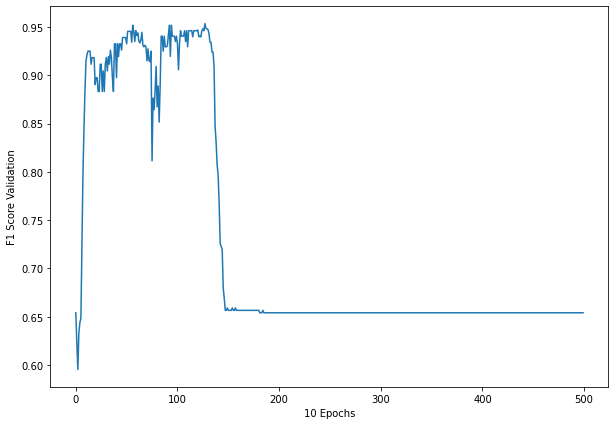

In [9]:
plot_progress(f1_p)